<a href="https://colab.research.google.com/github/valeromora/Procesamiento_Digital_de_Se-ales_2024_2/blob/main/exercise1_PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install dsp-utils

In [13]:
from dsp_utils.signals import SignalGenerator, Visualizer
import numpy as np
from scipy.signal import welch
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

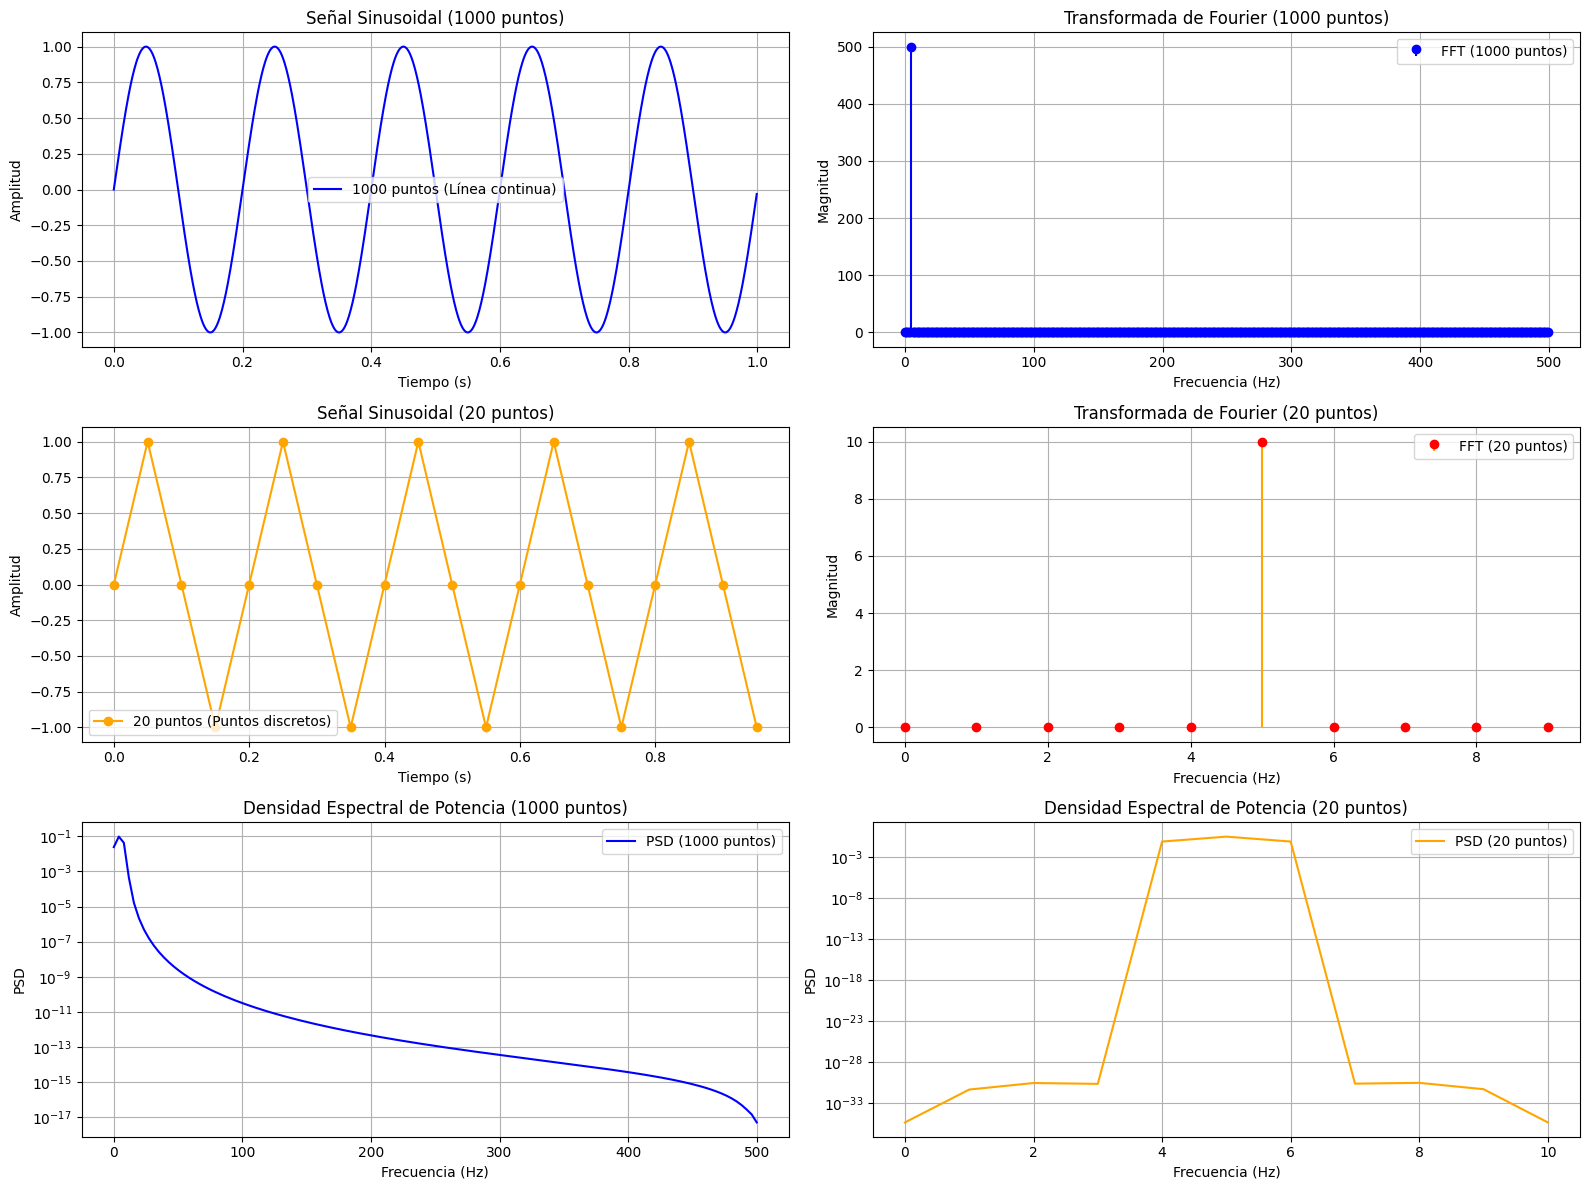

In [15]:
# Inicialización
generador_1000 = SignalGenerator(frequency=5, amplitude=1, duration=1, sampling_rate=1000)  # 1000 puntos
generador_20 = SignalGenerator(frequency=5, amplitude=1, duration=1, sampling_rate=20)      # 20 puntos

# Señales generadas
t1 = generador_1000.time
t2 = generador_20.time
sin1 = generador_1000.sine_wave
sin2 = generador_20.sine_wave

# FFT y frecuencias
fft_sin1 = fft(sin1)
fft_sin2 = fft(sin2)
freq1 = fftfreq(len(sin1), d=(t1[1] - t1[0]))[:len(sin1) // 2]
freq2 = fftfreq(len(sin2), d=(t2[1] - t2[0]))[:len(sin2) // 2]
fft_sin1_mag = np.abs(fft_sin1)[:len(sin1) // 2]
fft_sin2_mag = np.abs(fft_sin2)[:len(sin2) // 2]

# PSD usando Welch
freq_psd1, psd1 = welch(sin1, fs=generador_1000.sampling_rate, nperseg=256)
freq_psd2, psd2 = welch(sin2, fs=generador_20.sampling_rate, nperseg=256)


plt.figure(figsize=(16, 12))

# Señal 1000 puntos
plt.subplot(3, 2, 1)
plt.plot(t1, sin1, label='1000 puntos (Línea continua)', color='blue')
plt.title('Señal Sinusoidal (1000 puntos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FFT 1000 puntos
plt.subplot(3, 2, 2)
plt.stem(freq1, fft_sin1_mag, linefmt='blue', markerfmt='bo', basefmt=" ", label='FFT (1000 puntos)')
plt.title('Transformada de Fourier (1000 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()

# Señal 20 puntos
plt.subplot(3, 2, 3)
plt.plot(t2, sin2, 'o-', label='20 puntos (Puntos discretos)', color='orange')
plt.title('Señal Sinusoidal (20 puntos)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FFT 20 puntos
plt.subplot(3, 2, 4)
plt.stem(freq2, fft_sin2_mag, linefmt='orange', markerfmt='ro', basefmt=" ", label='FFT (20 puntos)')
plt.title('Transformada de Fourier (20 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.legend()

# PSD 1000 puntos
plt.subplot(3, 2, 5)
plt.semilogy(freq_psd1, psd1, label='PSD (1000 puntos)', color='blue')
plt.title('Densidad Espectral de Potencia (1000 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()

# PSD 20 puntos
plt.subplot(3, 2, 6)
plt.semilogy(freq_psd2, psd2, label='PSD (20 puntos)', color='orange')
plt.title('Densidad Espectral de Potencia (20 puntos)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
